Number of numeric features used for heatmap: 50


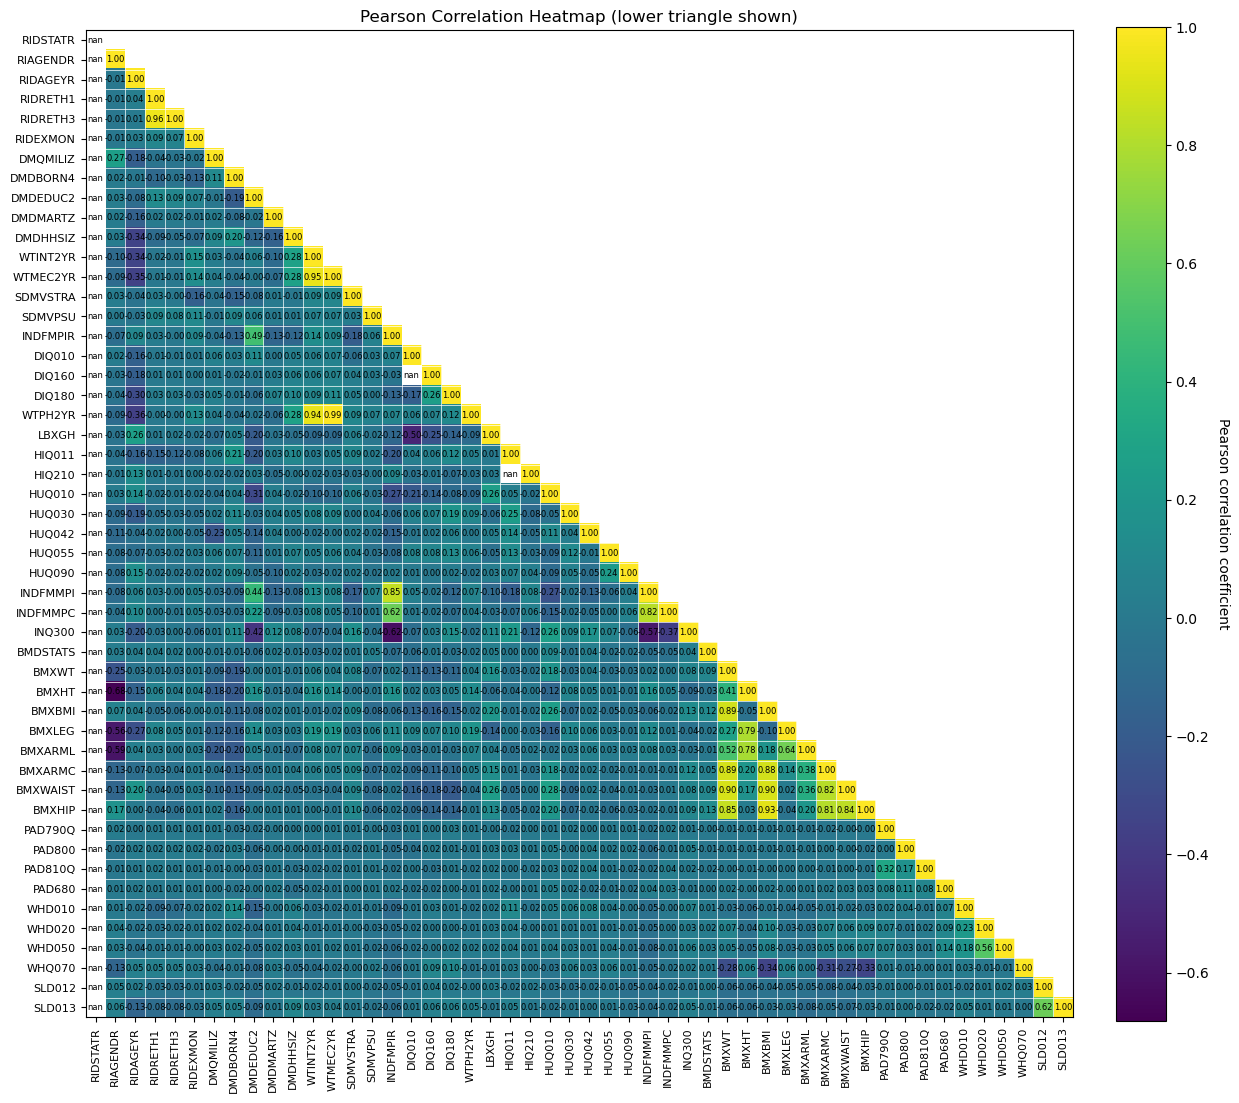

Saved heatmap to: figures/pearson_heatmap_all_features.png


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------- SETTINGS ----------
CSV_PATH = 'Cleaning_data_cleaned.csv'   # file you specified
OUT_DIR = 'figures'
OUT_FILE = os.path.join(OUT_DIR, 'pearson_heatmap_all_features.png')
ANNOTATE_THRESHOLD = 50   # if #vars <= this, annotate cell values
os.makedirs(OUT_DIR, exist_ok=True)

# ---------- Load data ----------
if not os.path.exists(CSV_PATH):
    raise FileNotFoundError(f"CSV file not found at: {CSV_PATH}")

df = pd.read_csv(CSV_PATH)

# ---------- Prepare numeric feature matrix ----------
# keep only numeric columns (drop non-numeric)
numeric_df = df.select_dtypes(include=[np.number]).copy()

# drop columns that are entirely missing
numeric_df = numeric_df.dropna(axis=1, how='all')

if numeric_df.shape[1] == 0:
    raise RuntimeError("No numeric columns found in the CSV after dropping fully-missing columns.")

# Optionally drop rows where everything is missing (rare)
numeric_df = numeric_df.dropna(axis=0, how='all')

# ---------- Compute Pearson correlation matrix ----------
corr = numeric_df.corr(method='pearson')

# sort variables by absolute correlation with the first column for nicer ordering (optional)
# Here we keep the natural ordering. If you prefer to reorder, uncomment following block:
#ref = corr.iloc[:,0].abs().sort_values(ascending=False).index
#corr = corr.loc[ref, ref]

vars_count = corr.shape[0]
print(f"Number of numeric features used for heatmap: {vars_count}")

# ---------- Create mask for upper triangle (so plot only lower triangle) ----------
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask, k=1)] = True  # mask upper triangle (k=1 keeps diagonal)

# create masked array so masked cells are not shown (will be white)
corr_masked = np.ma.masked_where(mask, corr.values)

# ---------- Plot heatmap ----------
fig_width = max(10, vars_count * 0.25)
fig_height = max(8, vars_count * 0.25)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# imshow the masked correlation matrix
cax = ax.imshow(corr_masked, interpolation='nearest', aspect='equal')

# ticks and labels
ax.set_xticks(np.arange(vars_count))
ax.set_yticks(np.arange(vars_count))
ax.set_xticklabels(corr.columns, rotation=90, fontsize=8)
ax.set_yticklabels(corr.index, fontsize=8)

# draw grid lines between cells for readability
ax.set_xticks(np.arange(-0.5, vars_count, 1), minor=True)
ax.set_yticks(np.arange(-0.5, vars_count, 1), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=0.5)
ax.tick_params(which='minor', bottom=False, left=False)

# colorbar
cbar = fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Pearson correlation coefficient', rotation=270, labelpad=15)

ax.set_title('Pearson Correlation Heatmap (lower triangle shown)')

# annotate values if dimension is small enough
if vars_count <= ANNOTATE_THRESHOLD:
    for i in range(vars_count):
        for j in range(vars_count):
            # only annotate lower triangle and diagonal (where mask is False)
            if not mask[i, j]:
                val = corr.values[i, j]
                ax.text(j, i, f"{val:.2f}", ha='center', va='center', fontsize=6)
else:
    # add note on the figure about no annotation
    ax.text(0.01, 0.99, 'Annotations omitted for readability (too many variables)',
            transform=ax.transAxes, va='top', ha='left', fontsize=9, bbox=dict(boxstyle='round', fc='w', alpha=0.7))

plt.tight_layout()
plt.savefig(OUT_FILE, dpi=200, bbox_inches='tight')
plt.show()

print(f"Saved heatmap to: {OUT_FILE}")



Computing Spearman correlation matrix...
Number of numeric features used for Spearman heatmap: 50


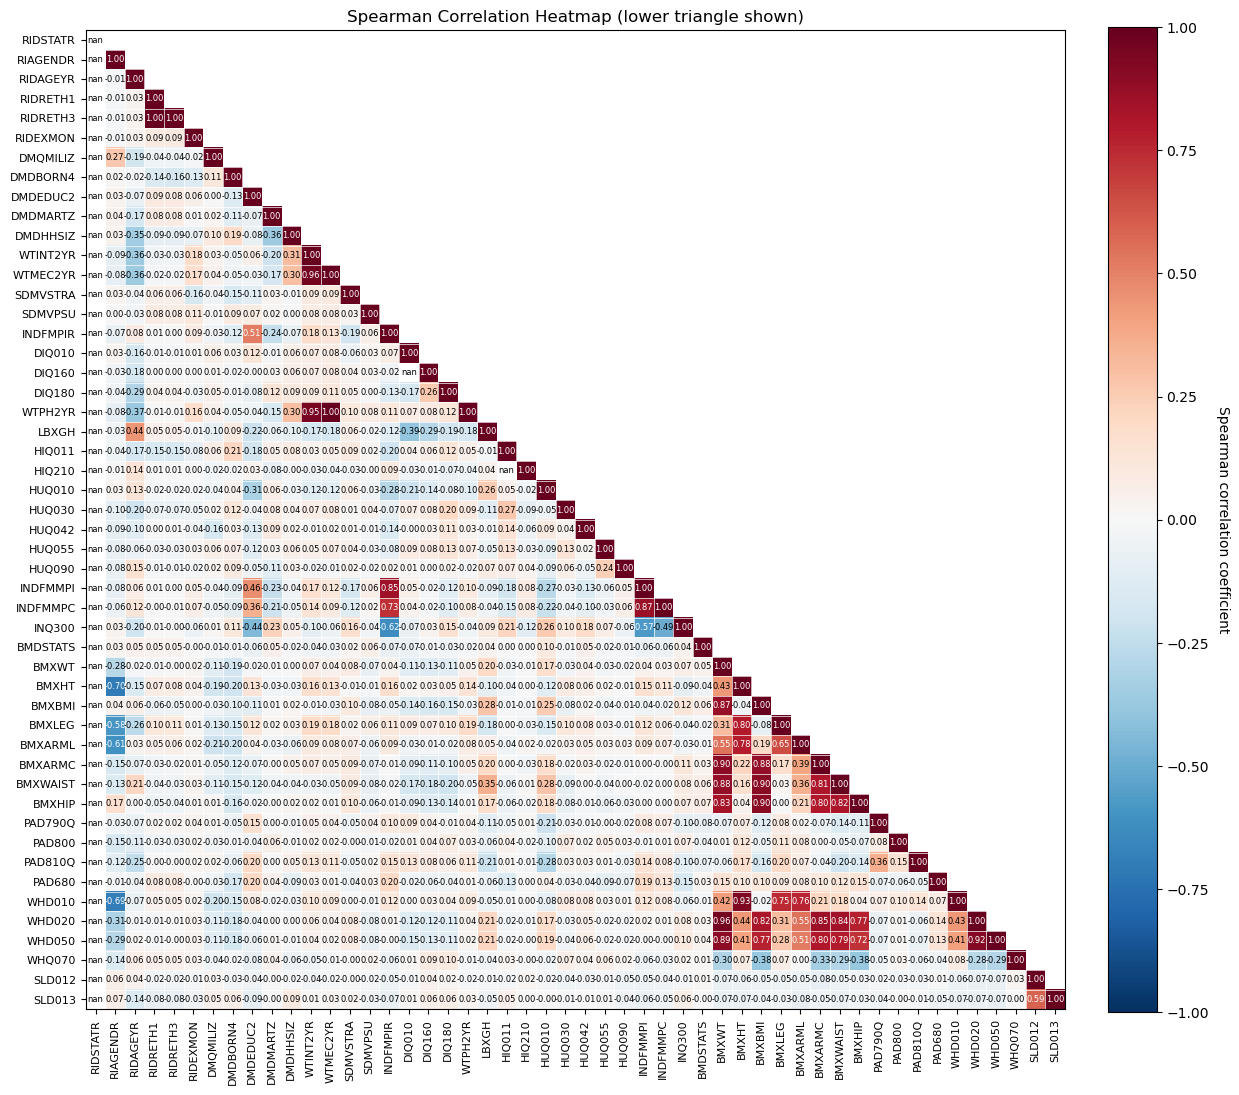

Saved Spearman heatmap to: figures/spearman_heatmap_all_features.png

CORRELATION COMPARISON: PEARSON vs SPEARMAN
Pearson correlation: measures LINEAR relationships
Spearman correlation: measures MONOTONIC relationships (rank-based)

Both heatmaps saved to: figures/


In [3]:
import seaborn as sns
from scipy.stats import spearmanr

# ---------- Compute Spearman correlation matrix ----------
# Spearman correlation measures monotonic relationships (rank-based)
print("\nComputing Spearman correlation matrix...")
spearman_corr = numeric_df.corr(method='spearman')

vars_count_spearman = spearman_corr.shape[0]
print(f"Number of numeric features used for Spearman heatmap: {vars_count_spearman}")

# ---------- Create mask for upper triangle ----------
mask_spearman = np.zeros_like(spearman_corr, dtype=bool)
mask_spearman[np.triu_indices_from(mask_spearman, k=1)] = True

# create masked array
spearman_masked = np.ma.masked_where(mask_spearman, spearman_corr.values)

# ---------- Plot Spearman heatmap ----------
fig_width = max(10, vars_count_spearman * 0.25)
fig_height = max(8, vars_count_spearman * 0.25)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# imshow the masked Spearman correlation matrix
cax = ax.imshow(spearman_masked, interpolation='nearest', aspect='equal', cmap='RdBu_r', vmin=-1, vmax=1)

# ticks and labels
ax.set_xticks(np.arange(vars_count_spearman))
ax.set_yticks(np.arange(vars_count_spearman))
ax.set_xticklabels(spearman_corr.columns, rotation=90, fontsize=8)
ax.set_yticklabels(spearman_corr.index, fontsize=8)

# draw grid lines between cells
ax.set_xticks(np.arange(-0.5, vars_count_spearman, 1), minor=True)
ax.set_yticks(np.arange(-0.5, vars_count_spearman, 1), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=0.5)
ax.tick_params(which='minor', bottom=False, left=False)

# colorbar
cbar = fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Spearman correlation coefficient', rotation=270, labelpad=15)

ax.set_title('Spearman Correlation Heatmap (lower triangle shown)')

# annotate values if dimension is small enough
if vars_count_spearman <= ANNOTATE_THRESHOLD:
    for i in range(vars_count_spearman):
        for j in range(vars_count_spearman):
            # only annotate lower triangle and diagonal
            if not mask_spearman[i, j]:
                val = spearman_corr.values[i, j]
                text_color = 'white' if abs(val) > 0.5 else 'black'
                ax.text(j, i, f"{val:.2f}", ha='center', va='center', fontsize=6, color=text_color)
else:
    ax.text(0.01, 0.99, 'Annotations omitted for readability (too many variables)',
            transform=ax.transAxes, va='top', ha='left', fontsize=9, bbox=dict(boxstyle='round', fc='w', alpha=0.7))

plt.tight_layout()
OUT_FILE_SPEARMAN = os.path.join(OUT_DIR, 'spearman_heatmap_all_features.png')
plt.savefig(OUT_FILE_SPEARMAN, dpi=200, bbox_inches='tight')
plt.show()

print(f"Saved Spearman heatmap to: {OUT_FILE_SPEARMAN}")
print("\n" + "="*70)
print("CORRELATION COMPARISON: PEARSON vs SPEARMAN")
print("="*70)
print(f"Pearson correlation: measures LINEAR relationships")
print(f"Spearman correlation: measures MONOTONIC relationships (rank-based)")
print(f"\nBoth heatmaps saved to: {OUT_DIR}/")
print("="*70)


VARIABLES MOST STRONGLY CORRELATED WITH HbA1c (LBXGH)

              PEARSON CORRELATION (Linear Relationships)              
----------------------------------------------------------------------

TOP POSITIVE (Most positively related to HbA1c):
   1. BMIHIP               → +nan
   2. BMIWAIST             → +nan
   3. BMIARMC              → +nan
   4. BMIARML              → +nan
   5. BMILEG               → +nan
   6. BMXHEAD              → +nan
   7. BMIRECUM             → +nan
   8. BMXRECUM             → +nan
   9. HIQ032I              → +nan
  10. HIQ032H              → +nan

TOP NEGATIVE (Most negatively related to HbA1c):
   1. DIQ010               → -0.4909
   2. DIQ050               → -0.3290
   3. DIQ070               → -0.3237
   4. DMDEDUC2             → -0.2012
   5. DIQ160               → -0.1563
   6. BMXLEG               → -0.1462
   7. RIDEXAGM             → -0.1410
   8. INDFMPIR             → -0.0971
   9. DMDHHSIZ             → -0.0956
  10. DMDHREDZ             → 

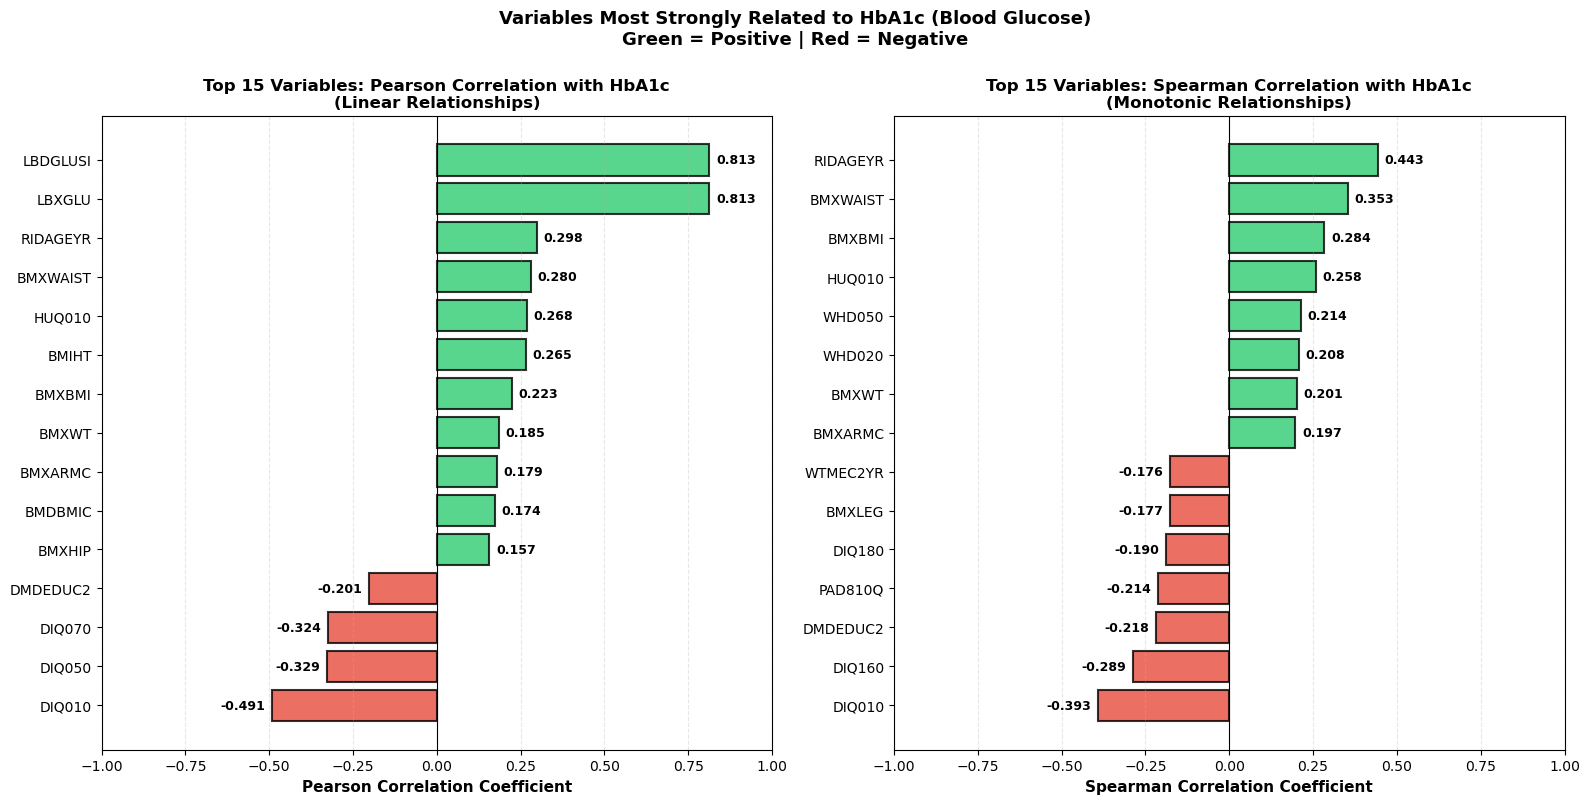


Visualization saved to: figures/correlations_with_hbA1c.png

INTERPRETATION:
• GREEN bars: Positively correlated with HbA1c (higher → higher blood glucose)
• RED bars: Negatively correlated with HbA1c (higher → lower blood glucose)
• Strong correlations (|r| > 0.3) suggest strong relationships
• Variables with |Pearson| ≠ |Spearman| indicate non-linear relationships


In [5]:
# ---------- ANALYZE CORRELATIONS WITH HbA1c (LBXGH) ----------
print("\n" + "="*70)
print("VARIABLES MOST STRONGLY CORRELATED WITH HbA1c (LBXGH)")
print("="*70)

# Check if LBXGH exists
if 'LBXGH' not in numeric_df.columns:
    print("WARNING: LBXGH (HbA1c) column not found in dataset.")
else:
    # Extract correlations with LBXGH from both methods
    pearson_with_hba1c = corr['LBXGH'].drop('LBXGH').sort_values()
    spearman_with_hba1c = spearman_corr['LBXGH'].drop('LBXGH').sort_values()
    
    # Get top positive and negative correlations
    top_n = 10
    
    print(f"\n{'PEARSON CORRELATION (Linear Relationships)':^70}")
    print("-"*70)
    print("\nTOP POSITIVE (Most positively related to HbA1c):")
    for idx, (var, corr_val) in enumerate(pearson_with_hba1c.tail(top_n).iloc[::-1].items(), 1):
        print(f"  {idx:2d}. {var:20s} → {corr_val:+.4f}")
    
    print("\nTOP NEGATIVE (Most negatively related to HbA1c):")
    for idx, (var, corr_val) in enumerate(pearson_with_hba1c.head(top_n).items(), 1):
        print(f"  {idx:2d}. {var:20s} → {corr_val:+.4f}")
    
    print(f"\n{'SPEARMAN CORRELATION (Monotonic Relationships)':^70}")
    print("-"*70)
    print("\nTOP POSITIVE (Most positively related to HbA1c):")
    for idx, (var, corr_val) in enumerate(spearman_with_hba1c.tail(top_n).iloc[::-1].items(), 1):
        print(f"  {idx:2d}. {var:20s} → {corr_val:+.4f}")
    
    print("\nTOP NEGATIVE (Most negatively related to HbA1c):")
    for idx, (var, corr_val) in enumerate(spearman_with_hba1c.head(top_n).items(), 1):
        print(f"  {idx:2d}. {var:20s} → {corr_val:+.4f}")
    
    # ---------- CREATE COMPARISON VISUALIZATION ----------
    # Get top 15 absolute correlations for visualization
    top_abs_pearson = pearson_with_hba1c.abs().nlargest(15)
    top_abs_spearman = spearman_with_hba1c.abs().nlargest(15)
    
    # Create side-by-side bar plot
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    # Pearson plot
    pearson_vals = pearson_with_hba1c[top_abs_pearson.index].sort_values()
    colors_p = ['#e74c3c' if x < 0 else '#2ecc71' for x in pearson_vals]
    axes[0].barh(range(len(pearson_vals)), pearson_vals, color=colors_p, alpha=0.8, edgecolor='black', linewidth=1.5)
    axes[0].set_yticks(range(len(pearson_vals)))
    axes[0].set_yticklabels(pearson_vals.index, fontsize=10)
    axes[0].set_xlabel('Pearson Correlation Coefficient', fontsize=11, fontweight='bold')
    axes[0].set_title('Top 15 Variables: Pearson Correlation with HbA1c\n(Linear Relationships)', 
                      fontsize=12, fontweight='bold')
    axes[0].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    axes[0].grid(axis='x', alpha=0.3, linestyle='--')
    axes[0].set_xlim(-1, 1)
    
    # Add value labels
    for i, v in enumerate(pearson_vals):
        axes[0].text(v + 0.02 if v > 0 else v - 0.02, i, f'{v:.3f}', 
                    va='center', ha='left' if v > 0 else 'right', fontweight='bold', fontsize=9)
    
    # Spearman plot
    spearman_vals = spearman_with_hba1c[top_abs_spearman.index].sort_values()
    colors_s = ['#e74c3c' if x < 0 else '#2ecc71' for x in spearman_vals]
    axes[1].barh(range(len(spearman_vals)), spearman_vals, color=colors_s, alpha=0.8, edgecolor='black', linewidth=1.5)
    axes[1].set_yticks(range(len(spearman_vals)))
    axes[1].set_yticklabels(spearman_vals.index, fontsize=10)
    axes[1].set_xlabel('Spearman Correlation Coefficient', fontsize=11, fontweight='bold')
    axes[1].set_title('Top 15 Variables: Spearman Correlation with HbA1c\n(Monotonic Relationships)', 
                      fontsize=12, fontweight='bold')
    axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    axes[1].grid(axis='x', alpha=0.3, linestyle='--')
    axes[1].set_xlim(-1, 1)
    
    # Add value labels
    for i, v in enumerate(spearman_vals):
        axes[1].text(v + 0.02 if v > 0 else v - 0.02, i, f'{v:.3f}', 
                    va='center', ha='left' if v > 0 else 'right', fontweight='bold', fontsize=9)
    
    fig.suptitle('Variables Most Strongly Related to HbA1c (Blood Glucose)\nGreen = Positive | Red = Negative', 
                 fontsize=13, fontweight='bold', y=1.00)
    plt.tight_layout()
    
    OUT_FILE_HBAIC = os.path.join(OUT_DIR, 'correlations_with_hbA1c.png')
    plt.savefig(OUT_FILE_HBAIC, dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\nVisualization saved to: {OUT_FILE_HBAIC}")
    print("="*70)
    print("\nINTERPRETATION:")
    print("• GREEN bars: Positively correlated with HbA1c (higher → higher blood glucose)")
    print("• RED bars: Negatively correlated with HbA1c (higher → lower blood glucose)")
    print("• Strong correlations (|r| > 0.3) suggest strong relationships")
    print("• Variables with |Pearson| ≠ |Spearman| indicate non-linear relationships")
    print("="*70)


MULTIVARIABLE REGRESSION ANALYSIS
Question: Does education independently predict HbA1c
         after adjusting for age, race, BMI, and income?

Searching for variables in dataset...
Education candidates: ['DMDEDUC2']
Race candidates: ['RIDRETH1', 'RIDRETH3']
BMI candidates: ['BMXWT', 'BMIWT', 'BMXRECUM', 'BMIRECUM', 'BMXHEAD', 'BMIHEAD', 'BMXHT', 'BMIHT', 'BMXBMI', 'BMDBMIC', 'BMXLEG', 'BMILEG', 'BMXARML', 'BMIARML', 'BMXARMC', 'BMIARMC', 'BMXWAIST', 'BMIWAIST', 'BMXHIP', 'BMIHIP']
Income candidates: ['INDFMPIR', 'INDFMMPI', 'INDFMMPC']

✓ Outcome variable: LBXGH
✓ Proceeding with analysis using variables: ['RIDAGEYR', 'DMDEDUC2', 'LBXGH']

----------------------------------------------------------------------
MODEL 1: Base Model (without education)
Predictors: ['RIDAGEYR', 'RIDRETH1', 'BMXWT', 'INDFMPIR']
----------------------------------------------------------------------
R-squared: 0.1102
RMSE: 1.0460
Intercept: 4.4329

Coefficients:
  RIDAGEYR            : +0.017294
  RIDRETH1 

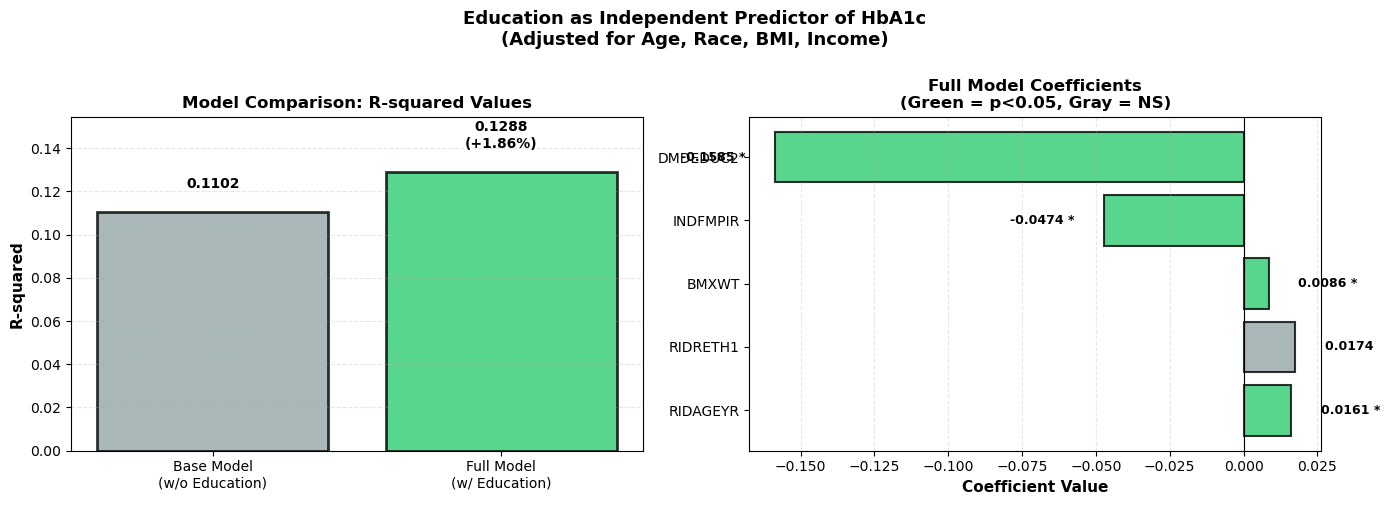


Visualization saved to: figures/education_hba1c_regression_analysis.png


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

# ---------- MULTIVARIABLE REGRESSION: Does Education Independently Predict HbA1c? ----------
print("\n" + "="*70)
print("MULTIVARIABLE REGRESSION ANALYSIS")
print("Question: Does education independently predict HbA1c")
print("         after adjusting for age, race, BMI, and income?")
print("="*70)

# Define variable names (adjust based on your dataset)
# Common NHANES variable names
education_var = None
age_var = 'RIDAGEYR'
race_var = None  # often RIDRETH1 or RIDRETH3
bmi_var = None   # often BMXBMI
income_var = None  # often INDFMPIR (income-to-poverty ratio)
outcome_var = 'LBXGH'

# Search for these variables in the dataframe
print("\nSearching for variables in dataset...")
available_cols = df.columns.tolist()

# Try common education variable names
education_candidates = [col for col in available_cols if 'DMDEDUC' in col or 'educ' in col.lower()]
# Try common race variable names
race_candidates = [col for col in available_cols if 'RIDRETH' in col or 'race' in col.lower()]
# Try common BMI variable names
bmi_candidates = [col for col in available_cols if 'BMX' in col or 'bmi' in col.lower()]
# Try common income variable names
income_candidates = [col for col in available_cols if 'INDF' in col or 'income' in col.lower() or 'pov' in col.lower()]

print(f"Education candidates: {education_candidates}")
print(f"Race candidates: {race_candidates}")
print(f"BMI candidates: {bmi_candidates}")
print(f"Income candidates: {income_candidates}")

# Assign if found
if education_candidates:
    education_var = education_candidates[0]
if race_candidates:
    race_var = race_candidates[0]
if bmi_candidates:
    bmi_var = bmi_candidates[0]
if income_candidates:
    income_var = income_candidates[0]

# Check if outcome exists
if outcome_var not in df.columns:
    print(f"\nWARNING: Outcome variable {outcome_var} not found!")
else:
    print(f"\n✓ Outcome variable: {outcome_var}")

# Prepare analysis if we have enough variables
required_vars = [age_var, education_var, outcome_var]
available_vars = [v for v in required_vars if v and v in df.columns]

if len(available_vars) >= 3:  # At minimum: age, education, outcome
    print(f"✓ Proceeding with analysis using variables: {available_vars}")
    
    # Build covariate list
    covariates_base = [age_var]
    covariates_full = [age_var]
    
    if race_var and race_var in df.columns:
        covariates_base.append(race_var)
        covariates_full.append(race_var)
    if bmi_var and bmi_var in df.columns:
        covariates_base.append(bmi_var)
        covariates_full.append(bmi_var)
    if income_var and income_var in df.columns:
        covariates_base.append(income_var)
        covariates_full.append(income_var)
    
    # Model 1: Base model without education
    print("\n" + "-"*70)
    print("MODEL 1: Base Model (without education)")
    print(f"Predictors: {covariates_base}")
    print("-"*70)
    
    df_model = df[[outcome_var] + covariates_base + [education_var]].dropna()
    
    if len(df_model) > 0:
        X_base = df_model[covariates_base]
        y = df_model[outcome_var]
        
        model_base = LinearRegression()
        model_base.fit(X_base, y)
        y_pred_base = model_base.predict(X_base)
        
        # Calculate R-squared and RMSE for base model
        from sklearn.metrics import r2_score, mean_squared_error
        r2_base = r2_score(y, y_pred_base)
        rmse_base = np.sqrt(mean_squared_error(y, y_pred_base))
        
        print(f"R-squared: {r2_base:.4f}")
        print(f"RMSE: {rmse_base:.4f}")
        print(f"Intercept: {model_base.intercept_:.4f}")
        print("\nCoefficients:")
        for var, coef in zip(covariates_base, model_base.coef_):
            print(f"  {var:20s}: {coef:+.6f}")
        
        # Model 2: Full model with education
        print("\n" + "-"*70)
        print("MODEL 2: Full Model (with education)")
        print(f"Predictors: {covariates_full + [education_var]}")
        print("-"*70)
        
        X_full = df_model[covariates_full + [education_var]]
        
        model_full = LinearRegression()
        model_full.fit(X_full, y)
        y_pred_full = model_full.predict(X_full)
        
        r2_full = r2_score(y, y_pred_full)
        rmse_full = np.sqrt(mean_squared_error(y, y_pred_full))
        
        print(f"R-squared: {r2_full:.4f}")
        print(f"RMSE: {rmse_full:.4f}")
        print(f"Intercept: {model_full.intercept_:.4f}")
        print("\nCoefficients:")
        for var, coef in zip(covariates_full + [education_var], model_full.coef_):
            print(f"  {var:20s}: {coef:+.6f}")
        
        # Model comparison
        print("\n" + "-"*70)
        print("MODEL COMPARISON")
        print("-"*70)
        delta_r2 = r2_full - r2_base
        print(f"Change in R-squared (Model 2 - Model 1): {delta_r2:+.4f}")
        print(f"Improvement in R-squared: {delta_r2*100:.2f}%")
        
        # T-statistic for education coefficient (approximate using standardized residuals)
        residuals = y - y_pred_full
        n = len(y)
        k = X_full.shape[1]
        mse = np.sum(residuals**2) / (n - k - 1)
        
        # Calculate standard errors
        X_full_with_const = np.column_stack([np.ones(n), X_full])
        var_covar = mse * np.linalg.inv(X_full_with_const.T @ X_full_with_const)
        se = np.sqrt(np.diag(var_covar))
        
        # T-statistics and p-values
        t_stats = model_full.coef_ / se[1:]
        p_values = [2 * (1 - stats.t.cdf(abs(t), n - k - 1)) for t in t_stats]
        
        print("\n" + "-"*70)
        print("STATISTICAL SIGNIFICANCE (Full Model)")
        print("-"*70)
        for var, t_stat, p_val in zip(covariates_full + [education_var], t_stats, p_values):
            sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "NS"
            print(f"  {var:20s} | t = {t_stat:+.4f} | p = {p_val:.6f} {sig}")
        
        # Extract education coefficient and significance
        edu_idx = len(covariates_full)
        edu_coef = model_full.coef_[edu_idx]
        edu_t = t_stats[edu_idx]
        edu_p = p_values[edu_idx]
        edu_se = se[edu_idx + 1]
        
        print("\n" + "="*70)
        print("MAIN FINDING: EDUCATION AND HbA1c")
        print("="*70)
        if edu_p < 0.05:
            direction = "POSITIVELY" if edu_coef > 0 else "NEGATIVELY"
            print(f"✓ Education DOES independently predict HbA1c")
            print(f"  (p = {edu_p:.6f}, statistically significant at α=0.05)")
            print(f"\n  Direction: Education {direction} predicts HbA1c")
            print(f"  Coefficient: {edu_coef:+.6f} (SE={edu_se:.6f})")
            print(f"  Interpretation: Each unit increase in education")
            print(f"                   is associated with a {abs(edu_coef):.6f} unit")
            print(f"                   {'increase' if edu_coef > 0 else 'decrease'} in HbA1c")
            print(f"                   (after adjusting for age, race, BMI, income)")
        else:
            print(f"✗ Education does NOT independently predict HbA1c")
            print(f"  (p = {edu_p:.6f}, NOT statistically significant at α=0.05)")
            print(f"\n  Coefficient: {edu_coef:+.6f} (SE={edu_se:.6f})")
            print(f"  Interpretation: No significant association between education")
            print(f"                   and HbA1c after adjusting for other factors")
        
        print("="*70)
        
        # Visualization
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        # Plot 1: Model comparison (R-squared)
        models = ['Base Model\n(w/o Education)', 'Full Model\n(w/ Education)']
        r2_values = [r2_base, r2_full]
        colors_comp = ['#95a5a6', '#2ecc71' if r2_full > r2_base else '#e74c3c']
        bars = axes[0].bar(models, r2_values, color=colors_comp, alpha=0.8, edgecolor='black', linewidth=2)
        axes[0].set_ylabel('R-squared', fontsize=11, fontweight='bold')
        axes[0].set_title('Model Comparison: R-squared Values', fontsize=12, fontweight='bold')
        axes[0].set_ylim(0, max(r2_values) * 1.2)
        axes[0].grid(axis='y', alpha=0.3, linestyle='--')
        
        for bar, val in zip(bars, r2_values):
            axes[0].text(bar.get_x() + bar.get_width()/2, val + 0.01,
                        f'{val:.4f}\n(+{(val-r2_base)*100:.2f}%)' if val == r2_full else f'{val:.4f}',
                        ha='center', va='bottom', fontweight='bold', fontsize=10)
        
        # Plot 2: Coefficients with significance
        var_names = covariates_full + [education_var]
        coefs = model_full.coef_
        colors_coef = ['#2ecc71' if p < 0.05 else '#95a5a6' for p in p_values]
        
        y_pos = np.arange(len(var_names))
        bars = axes[1].barh(y_pos, coefs, color=colors_coef, alpha=0.8, edgecolor='black', linewidth=1.5)
        axes[1].set_yticks(y_pos)
        axes[1].set_yticklabels(var_names, fontsize=10)
        axes[1].set_xlabel('Coefficient Value', fontsize=11, fontweight='bold')
        axes[1].set_title('Full Model Coefficients\n(Green = p<0.05, Gray = NS)', fontsize=12, fontweight='bold')
        axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
        axes[1].grid(axis='x', alpha=0.3, linestyle='--')
        
        for i, (bar, coef, p_val) in enumerate(zip(bars, coefs, p_values)):
            sig_marker = "*" if p_val < 0.05 else ""
            axes[1].text(coef + 0.01 if coef > 0 else coef - 0.01, i,
                        f'{coef:.4f} {sig_marker}',
                        va='center', ha='left' if coef > 0 else 'right', fontweight='bold', fontsize=9)
        
        fig.suptitle('Education as Independent Predictor of HbA1c\n(Adjusted for Age, Race, BMI, Income)',
                    fontsize=13, fontweight='bold', y=1.00)
        plt.tight_layout()
        
        OUT_FILE_REGRESSION = os.path.join(OUT_DIR, 'education_hba1c_regression_analysis.png')
        plt.savefig(OUT_FILE_REGRESSION, dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"\nVisualization saved to: {OUT_FILE_REGRESSION}")
    else:
        print("\nERROR: Not enough valid data for regression analysis after removing missing values.")
else:
    print(f"\nERROR: Cannot proceed. Need at least outcome, age, and education variables.")
    print(f"Found: {available_vars}")

In [7]:
# ---------- FULL MULTIVARIABLE REGRESSION: Which Variables Independently Predict HbA1c? ----------
print("\n" + "="*70)
print("COMPREHENSIVE MULTIVARIABLE REGRESSION ANALYSIS")
print("Question: Which variables independently predict HIGHER HbA1c?")
print("="*70)

# Use numeric_df and check if outcome exists
if 'LBXGH' not in numeric_df.columns:
    print("\nWARNING: LBXGH (HbA1c) column not found!")
else:
    # Prepare data: outcome + all numeric predictors except LBXGH itself
    outcome = 'LBXGH'
    predictors = [col for col in numeric_df.columns if col != outcome]
    
    # Create analysis dataset
    analysis_data = numeric_df[[outcome] + predictors].dropna()
    
    print(f"\nDataset for analysis:")
    print(f"  Sample size: {len(analysis_data):,} (after removing rows with missing values)")
    print(f"  Outcome: {outcome}")
    print(f"  Predictors: {len(predictors)} variables")
    
    if len(analysis_data) > len(predictors) + 1:  # Need more samples than predictors
        # Prepare X and y
        X = analysis_data[predictors]
        y = analysis_data[outcome]
        
        # Fit OLS regression
        from sklearn.linear_model import LinearRegression
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        
        # Calculate model fit statistics
        from sklearn.metrics import r2_score, mean_squared_error
        r2 = r2_score(y, y_pred)
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        
        print(f"\n" + "-"*70)
        print("MODEL FIT")
        print("-"*70)
        print(f"R-squared: {r2:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"Model explains {r2*100:.2f}% of HbA1c variation")
        
        # Calculate p-values and standard errors
        n = len(y)
        k = X.shape[1]
        residuals = y - y_pred
        mse = np.sum(residuals**2) / (n - k - 1)
        
        X_with_const = np.column_stack([np.ones(n), X])
        var_covar = mse * np.linalg.inv(X_with_const.T @ X_with_const)
        se = np.sqrt(np.diag(var_covar))
        
        # T-stats and p-values
        t_stats = model.coef_ / se[1:]
        p_values = [2 * (1 - stats.t.cdf(abs(t), n - k - 1)) for t in t_stats]
        
        # Create results dataframe
        results_df = pd.DataFrame({
            'Variable': predictors,
            'Coefficient': model.coef_,
            'Std_Error': se[1:],
            'T_Statistic': t_stats,
            'P_Value': p_values,
            'Significant': ['Yes' if p < 0.05 else 'No' for p in p_values]
        })
        
        # Sort by absolute coefficient
        results_df['Abs_Coef'] = results_df['Coefficient'].abs()
        results_df = results_df.sort_values('Abs_Coef', ascending=False)
        
        # Print full results
        print(f"\n" + "-"*70)
        print("COMPLETE REGRESSION RESULTS (sorted by effect size)")
        print("-"*70)
        print(f"{'Variable':<20} {'Coefficient':>12} {'Std Error':>12} {'T-stat':>10} {'P-value':>12} {'Sig':<4}")
        print("-"*70)
        for _, row in results_df.iterrows():
            sig_marker = "***" if row['P_Value'] < 0.001 else "**" if row['P_Value'] < 0.01 else "*" if row['P_Value'] < 0.05 else "NS"
            print(f"{row['Variable']:<20} {row['Coefficient']:>+12.6f} {row['Std_Error']:>12.6f} {row['T_Statistic']:>+10.3f} {row['P_Value']:>12.6f} {sig_marker:<4}")
        
        # Identify significant positive predictors
        sig_positive = results_df[(results_df['P_Value'] < 0.05) & (results_df['Coefficient'] > 0)].sort_values('Coefficient', ascending=False)
        sig_negative = results_df[(results_df['P_Value'] < 0.05) & (results_df['Coefficient'] < 0)].sort_values('Coefficient', ascending=True)
        
        print("\n" + "="*70)
        print("KEY FINDINGS: INDEPENDENT PREDICTORS OF HIGHER HbA1c")
        print("="*70)
        
        if len(sig_positive) > 0:
            print("\nVARIABLES THAT INDEPENDENTLY PREDICT HIGHER HbA1c:")
            print("(Statistically significant, p < 0.05)")
            for idx, (_, row) in enumerate(sig_positive.iterrows(), 1):
                print(f"\n  {idx}. {row['Variable']}")
                print(f"     Coefficient: {row['Coefficient']:+.6f}")
                print(f"     P-value: {row['P_Value']:.2e}")
                print(f"     Interpretation: Each unit increase is associated with")
                print(f"                    {row['Coefficient']:+.4f} unit {'increase' if row['Coefficient'] > 0 else 'decrease'} in HbA1c")
        else:
            print("\nNo variables independently predict HIGHER HbA1c at p<0.05")
        
        if len(sig_negative) > 0:
            print("\n" + "-"*70)
            print("VARIABLES THAT INDEPENDENTLY PREDICT LOWER HbA1c:")
            print("(Statistically significant, p < 0.05)")
            for idx, (_, row) in enumerate(sig_negative.iterrows(), 1):
                print(f"\n  {idx}. {row['Variable']}")
                print(f"     Coefficient: {row['Coefficient']:+.6f}")
                print(f"     P-value: {row['P_Value']:.2e}")
                print(f"     Interpretation: Each unit increase is associated with")
                print(f"                    {abs(row['Coefficient']):.4f} unit decrease in HbA1c")
        
        print("\n" + "="*70)
        
        # ---------- VISUALIZATION ----------
        # Plot 1: Significant predictors only
        sig_results = results_df[results_df['P_Value'] < 0.05].sort_values('Coefficient')
        
        if len(sig_results) > 0:
            fig, axes = plt.subplots(1, 2, figsize=(16, 8))
            
            # Plot 1: Forest plot of significant predictors
            ax1 = axes[0]
            colors_forest = ['#e74c3c' if x < 0 else '#2ecc71' for x in sig_results['Coefficient']]
            y_pos = np.arange(len(sig_results))
            
            ax1.barh(y_pos, sig_results['Coefficient'], color=colors_forest, alpha=0.8, edgecolor='black', linewidth=1.5)
            ax1.set_yticks(y_pos)
            ax1.set_yticklabels(sig_results['Variable'], fontsize=10)
            ax1.set_xlabel('Regression Coefficient (Independent Effect on HbA1c)', fontsize=11, fontweight='bold')
            ax1.set_title('Significant Independent Predictors of HbA1c\n(p < 0.05)', fontsize=12, fontweight='bold')
            ax1.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
            ax1.grid(axis='x', alpha=0.3, linestyle='--')
            
            for i, (_, row) in enumerate(sig_results.iterrows()):
                ax1.text(row['Coefficient'] + 0.01 if row['Coefficient'] > 0 else row['Coefficient'] - 0.01, i,
                        f"{row['Coefficient']:+.4f}***" if row['P_Value'] < 0.001 else f"{row['Coefficient']:+.4f}**" if row['P_Value'] < 0.01 else f"{row['Coefficient']:+.4f}*",
                        va='center', ha='left' if row['Coefficient'] > 0 else 'right', fontweight='bold', fontsize=9)
            
            # Plot 2: All predictors by p-value and effect size
            ax2 = axes[1]
            # Create bubble plot: x = effect size, y = -log10(p-value), size = effect size
            log_pvals = -np.log10(results_df['P_Value'] + 1e-300)  # avoid log(0)
            sizes = np.abs(results_df['Coefficient']) * 500
            colors_bubble = ['#2ecc71' if c > 0 else '#e74c3c' for c in results_df['Coefficient']]
            
            scatter = ax2.scatter(results_df['Coefficient'], log_pvals, s=sizes, c=colors_bubble, 
                                 alpha=0.6, edgecolor='black', linewidth=1.5)
            
            # Add reference line for significance threshold
            ax2.axhline(y=-np.log10(0.05), color='red', linestyle='--', linewidth=2, label='p=0.05 threshold')
            ax2.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
            
            ax2.set_xlabel('Regression Coefficient', fontsize=11, fontweight='bold')
            ax2.set_ylabel('-log₁₀(P-value)', fontsize=11, fontweight='bold')
            ax2.set_title('Volcano Plot: All Predictors\n(Size = Effect Magnitude)', fontsize=12, fontweight='bold')
            ax2.grid(True, alpha=0.3, linestyle='--')
            ax2.legend(fontsize=10)
            
            # Add labels for significant variables
            for _, row in results_df[results_df['P_Value'] < 0.05].iterrows():
                ax2.annotate(row['Variable'], 
                           xy=(row['Coefficient'], -np.log10(row['P_Value'] + 1e-300)),
                           xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.8)
            
            fig.suptitle('Independent Predictors of HbA1c (Full Multivariable Model)\nGreen = Higher HbA1c | Red = Lower HbA1c',
                        fontsize=13, fontweight='bold', y=0.98)
            plt.tight_layout()
            
            OUT_FILE_FULL = os.path.join(OUT_DIR, 'all_independent_predictors_hba1c.png')
            plt.savefig(OUT_FILE_FULL, dpi=300, bbox_inches='tight')
            plt.show()
            
            print(f"\nVisualization saved to: {OUT_FILE_FULL}")
        
        # Save results to CSV
        results_df_export = results_df[['Variable', 'Coefficient', 'Std_Error', 'T_Statistic', 'P_Value', 'Significant']]
        results_df_export = results_df_export.sort_values('P_Value')
        OUT_CSV = os.path.join(OUT_DIR, 'regression_results_all_predictors.csv')
        results_df_export.to_csv(OUT_CSV, index=False)
        print(f"\nRegression results saved to: {OUT_CSV}")
        
    else:
        print(f"\nWARNING: Insufficient sample size for regression (n={len(analysis_data)}, p={len(predictors)})")
        print("Need n > p + 1 for stable regression estimates.")


COMPREHENSIVE MULTIVARIABLE REGRESSION ANALYSIS
Question: Which variables independently predict HIGHER HbA1c?

Dataset for analysis:
  Sample size: 0 (after removing rows with missing values)
  Outcome: LBXGH
  Predictors: 90 variables

Need n > p + 1 for stable regression estimates.



ANALYSIS: HbA1c vs Diagnosed Diabetes Status

Sample size: 6,715
Diagnosed diabetes: 822 (12.2%)
Not diagnosed: 5,893 (87.8%)

----------------------------------------------------------------------
APPROACH 1: POINT-BISERIAL CORRELATION
----------------------------------------------------------------------
(Appropriate for continuous × binary variable)

Point-biserial r: +0.6220
P-value: 0.000000
✓ Statistically significant association (p < 0.05)
  Interpretation: HbA1c is positively associated
                 with diabetes diagnosis.

----------------------------------------------------------------------
APPROACH 2: INDEPENDENT SAMPLES T-TEST
----------------------------------------------------------------------
(Compare mean HbA1c between diagnosed and non-diagnosed groups)

Mean HbA1c (Diagnosed):     7.4663 ± 1.7898
Mean HbA1c (Not Diagnosed): 5.4644 ± 0.5749
Difference (Diagnosed - Not Diagnosed): +2.0019

T-statistic: +65.0915
P-value: 0.00e+00
Cohen's d: 2.4244

✓ Statisticall

/var/folders/96/01zktq990kl46lfw0ld8kq040000gn/T/ipykernel_32117/2623924305.py:262: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


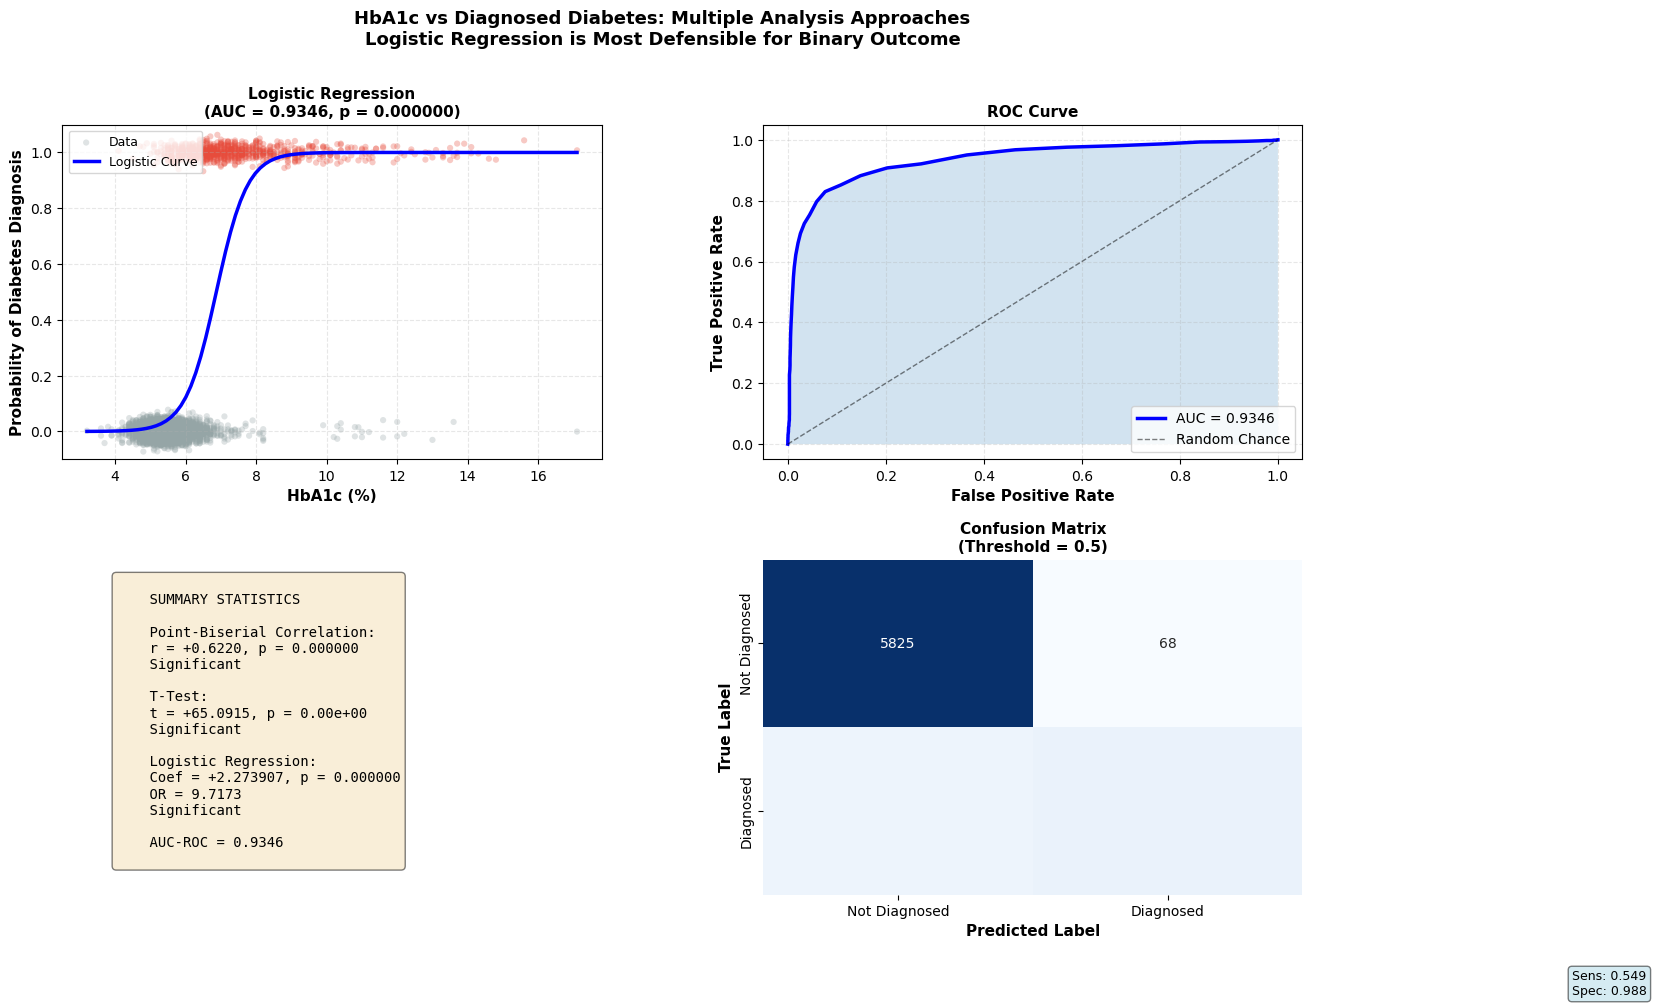


Comprehensive visualization saved to: figures/hba1c_vs_diagnosed_diabetes_comprehensive.png

RECOMMENDATIONS
For your research question:
  • Logistic regression is the most defensible approach
    (binary outcome ~ continuous predictor)
  • Report: AUC, sensitivity, specificity, and OR with 95% CI
  • T-test provides useful descriptive comparison of means
  • Point-biserial correlation is less appropriate here
    (though equivalent to Pearson for binary×continuous)


In [9]:
# ---------- HbA1c vs DIAGNOSED DIABETES: Multiple Analysis Approaches ----------
print("\n" + "="*70)
print("ANALYSIS: HbA1c vs Diagnosed Diabetes Status")
print("="*70)

# Check for diabetes diagnosis variable (DIQ010)
if 'DIQ010' not in df.columns or 'LBXGH' not in df.columns:
    print("\nWARNING: Required variables not found (DIQ010 or LBXGH)")
else:
    # Prepare data
    analysis_data_diab = df[['LBXGH', 'DIQ010']].dropna()
    
    # DIQ010: 1 = Yes (diagnosed), 2 = No, 3 = Borderline
    # Create binary variable: 1 = Diagnosed, 0 = Not diagnosed
    analysis_data_diab['diabetes_diagnosed'] = (analysis_data_diab['DIQ010'] == 1).astype(int)
    
    hba1c = analysis_data_diab['LBXGH'].values
    diabetes_status = analysis_data_diab['diabetes_diagnosed'].values
    
    print(f"\nSample size: {len(analysis_data_diab):,}")
    print(f"Diagnosed diabetes: {diabetes_status.sum():,} ({diabetes_status.sum()/len(diabetes_status)*100:.1f}%)")
    print(f"Not diagnosed: {(1-diabetes_status).sum():,} ({(1-diabetes_status).sum()/len(diabetes_status)*100:.1f}%)")
    
    # ======================================================================
    # APPROACH 1: Point-Biserial Correlation
    # ======================================================================
    print("\n" + "-"*70)
    print("APPROACH 1: POINT-BISERIAL CORRELATION")
    print("-"*70)
    print("(Appropriate for continuous × binary variable)")
    
    from scipy.stats import pointbiserialr
    r_pb, p_pb = pointbiserialr(diabetes_status, hba1c)
    
    print(f"\nPoint-biserial r: {r_pb:+.4f}")
    print(f"P-value: {p_pb:.6f}")
    
    if p_pb < 0.05:
        print(f"✓ Statistically significant association (p < 0.05)")
        print(f"  Interpretation: HbA1c is {'positively' if r_pb > 0 else 'negatively'} associated")
        print(f"                 with diabetes diagnosis.")
    else:
        print(f"✗ No statistically significant association (p ≥ 0.05)")
    
    # ======================================================================
    # APPROACH 2: T-Test (Mean Comparison)
    # ======================================================================
    print("\n" + "-"*70)
    print("APPROACH 2: INDEPENDENT SAMPLES T-TEST")
    print("-"*70)
    print("(Compare mean HbA1c between diagnosed and non-diagnosed groups)")
    
    from scipy.stats import ttest_ind
    
    hba1c_diagnosed = hba1c[diabetes_status == 1]
    hba1c_not_diagnosed = hba1c[diabetes_status == 0]
    
    mean_diagnosed = hba1c_diagnosed.mean()
    mean_not_diagnosed = hba1c_not_diagnosed.mean()
    std_diagnosed = hba1c_diagnosed.std()
    std_not_diagnosed = hba1c_not_diagnosed.std()
    
    t_stat, p_ttest = ttest_ind(hba1c_diagnosed, hba1c_not_diagnosed)
    
    print(f"\nMean HbA1c (Diagnosed):     {mean_diagnosed:.4f} ± {std_diagnosed:.4f}")
    print(f"Mean HbA1c (Not Diagnosed): {mean_not_diagnosed:.4f} ± {std_not_diagnosed:.4f}")
    print(f"Difference (Diagnosed - Not Diagnosed): {mean_diagnosed - mean_not_diagnosed:+.4f}")
    
    print(f"\nT-statistic: {t_stat:+.4f}")
    print(f"P-value: {p_ttest:.2e}")
    print(f"Cohen's d: {(mean_diagnosed - mean_not_diagnosed) / np.sqrt(((len(hba1c_diagnosed)-1)*std_diagnosed**2 + (len(hba1c_not_diagnosed)-1)*std_not_diagnosed**2) / (len(hba1c_diagnosed) + len(hba1c_not_diagnosed) - 2)):.4f}")
    
    if p_ttest < 0.05:
        print(f"\n✓ Statistically significant difference in mean HbA1c (p < 0.05)")
    else:
        print(f"\n✗ No statistically significant difference (p ≥ 0.05)")
    
    # ======================================================================
    # APPROACH 3: Logistic Regression
    # ======================================================================
    print("\n" + "-"*70)
    print("APPROACH 3: LOGISTIC REGRESSION (RECOMMENDED)")
    print("-"*70)
    print("(Predict probability of diabetes diagnosis from HbA1c)")
    print("Most defensible for binary outcome with continuous predictor")
    
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
    
    # Prepare data for logistic regression
    X_logit = hba1c.reshape(-1, 1)
    y_logit = diabetes_status
    
    # Fit logistic regression
    logit_model = LogisticRegression()
    logit_model.fit(X_logit, y_logit)
    
    # Get predictions
    y_pred_prob = logit_model.predict_proba(X_logit)[:, 1]
    y_pred = logit_model.predict(X_logit)
    
    # Calculate statistics
    coef = logit_model.coef_[0, 0]
    intercept = logit_model.intercept_[0]
    auc = roc_auc_score(y_logit, y_pred_prob)
    
    # Calculate p-value for coefficient (Wald test)
    from scipy import stats as scipy_stats
    # For logistic regression, use approximate standard error
    X_with_const = np.column_stack([np.ones(len(X_logit)), X_logit])
    # Predicted probabilities
    predictions = 1 / (1 + np.exp(-X_with_const @ np.array([intercept, coef])))
    # Weights for variance calculation
    weights = predictions * (1 - predictions)
    var_covar = np.linalg.inv(X_with_const.T @ (X_with_const * weights[:, np.newaxis]))
    se_coef = np.sqrt(np.diag(var_covar))[1]
    z_stat = coef / se_coef
    p_logit = 2 * (1 - scipy_stats.norm.cdf(abs(z_stat)))
    
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_logit, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    
    print(f"\nLogistic Regression Results:")
    print(f"  Intercept: {intercept:.6f}")
    print(f"  Coefficient (HbA1c): {coef:+.6f}")
    print(f"  Z-statistic: {z_stat:+.4f}")
    print(f"  P-value: {p_logit:.6f}")
    
    if p_logit < 0.05:
        print(f"  ✓ HbA1c significantly predicts diabetes diagnosis (p < 0.05)")
    else:
        print(f"  ✗ HbA1c does not significantly predict diagnosis (p ≥ 0.05)")
    
    print(f"\nModel Performance:")
    print(f"  AUC-ROC: {auc:.4f}")
    print(f"  Sensitivity: {sensitivity:.4f}")
    print(f"  Specificity: {specificity:.4f}")
    
    print(f"\nInterpretation:")
    odds_ratio = np.exp(coef)
    print(f"  Odds Ratio: {odds_ratio:.4f}")
    print(f"  For each 1-unit increase in HbA1c,")
    print(f"  the odds of being diagnosed with diabetes")
    print(f"  {'increase by' if odds_ratio > 1 else 'decrease by'} a factor of {odds_ratio:.4f}")
    print(f"  ({(odds_ratio-1)*100:+.1f}% change in odds)")
    
    print("\n" + "="*70)
    
    # ======================================================================
    # VISUALIZATION: Compare all three approaches
    # ======================================================================
    fig = plt.figure(figsize=(16, 10))
    gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)
    
    # # Plot 1: Box plot (T-test visualization)
    # ax1 = fig.add_subplot(gs[0, 0])
    # bp_data = [hba1c_not_diagnosed, hba1c_diagnosed]
    # bp = ax1.boxplot(bp_data, labels=['Not Diagnosed', 'Diagnosed'], patch_artist=True)
    # for patch, color in zip(bp['boxes'], ['#95a5a6', '#e74c3c']):
    #     patch.set_facecolor(color)
    #     patch.set_alpha(0.7)
    # ax1.set_ylabel('HbA1c (%)', fontsize=11, fontweight='bold')
    # ax1.set_title('T-Test: Mean HbA1c Comparison\n(p = {:.6f})'.format(p_ttest), fontsize=11, fontweight='bold')
    # ax1.grid(axis='y', alpha=0.3, linestyle='--')
    
    # # Add mean markers
    # means = [mean_not_diagnosed, mean_diagnosed]
    # ax1.scatter([1, 2], means, color='red', s=100, zorder=3, marker='D', label='Mean')
    
    # # Add text with statistics
    # ax1.text(0.5, 0.95, f'Δ Mean = {mean_diagnosed - mean_not_diagnosed:+.4f}', 
    #         transform=ax1.transAxes, fontsize=10, va='top', ha='center',
    #         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # # Plot 2: Scatter with point-biserial correlation
    # ax2 = fig.add_subplot(gs[0, 1])
    # colors_scatter = ['#95a5a6' if x == 0 else '#e74c3c' for x in diabetes_status]
    # ax2.scatter(hba1c, diabetes_status + np.random.normal(0, 0.02, len(diabetes_status)), 
    #            c=colors_scatter, alpha=0.4, s=20, edgecolor='none')
    # ax2.set_xlabel('HbA1c (%)', fontsize=11, fontweight='bold')
    # ax2.set_ylabel('Diagnosed Diabetes', fontsize=11, fontweight='bold')
    # ax2.set_yticks([0, 1])
    # ax2.set_yticklabels(['No', 'Yes'])
    # ax2.set_title('Point-Biserial Correlation\n(r = {:.4f}, p = {:.6f})'.format(r_pb, p_pb), fontsize=11, fontweight='bold')
    # ax2.grid(True, alpha=0.3, linestyle='--')
    
    # Plot 3: Logistic regression curve
    ax3 = fig.add_subplot(gs[0, 0])
    hba1c_range = np.linspace(hba1c.min(), hba1c.max(), 100).reshape(-1, 1)
    prob_range = logit_model.predict_proba(hba1c_range)[:, 1]
    
    ax3.scatter(hba1c, diabetes_status + np.random.normal(0, 0.02, len(diabetes_status)), 
               c=colors_scatter, alpha=0.3, s=20, edgecolor='none', label='Data')
    ax3.plot(hba1c_range, prob_range, 'b-', linewidth=2.5, label='Logistic Curve')
    ax3.set_xlabel('HbA1c (%)', fontsize=11, fontweight='bold')
    ax3.set_ylabel('Probability of Diabetes Diagnosis', fontsize=11, fontweight='bold')
    ax3.set_ylim(-0.1, 1.1)
    ax3.set_title('Logistic Regression\n(AUC = {:.4f}, p = {:.6f})'.format(auc, p_logit), fontsize=11, fontweight='bold')
    ax3.grid(True, alpha=0.3, linestyle='--')
    ax3.legend(loc='upper left', fontsize=9)
    
    # Plot 4: ROC Curve
    ax4 = fig.add_subplot(gs[0, 1])
    fpr, tpr, _ = roc_curve(y_logit, y_pred_prob)
    ax4.plot(fpr, tpr, 'b-', linewidth=2.5, label=f'AUC = {auc:.4f}')
    ax4.plot([0, 1], [0, 1], 'k--', linewidth=1, alpha=0.5, label='Random Chance')
    ax4.fill_between(fpr, tpr, alpha=0.2)
    ax4.set_xlabel('False Positive Rate', fontsize=11, fontweight='bold')
    ax4.set_ylabel('True Positive Rate', fontsize=11, fontweight='bold')
    ax4.set_title('ROC Curve', fontsize=11, fontweight='bold')
    ax4.legend(loc='lower right', fontsize=10)
    ax4.grid(True, alpha=0.3, linestyle='--')
    
    # Plot 5: Summary statistics table
    ax5 = fig.add_subplot(gs[1, 0])
    ax5.axis('off')
    
    summary_text = f"""
    SUMMARY STATISTICS
    
    Point-Biserial Correlation:
    r = {r_pb:+.4f}, p = {p_pb:.6f}
    {'Significant' if p_pb < 0.05 else 'Not significant'}
    
    T-Test:
    t = {t_stat:+.4f}, p = {p_ttest:.2e}
    {'Significant' if p_ttest < 0.05 else 'Not significant'}
    
    Logistic Regression:
    Coef = {coef:+.6f}, p = {p_logit:.6f}
    OR = {odds_ratio:.4f}
    {'Significant' if p_logit < 0.05 else 'Not significant'}
    
    AUC-ROC = {auc:.4f}
    """
    
    ax5.text(0.1, 0.95, summary_text, transform=ax5.transAxes, fontsize=10,
            verticalalignment='top', family='monospace',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # Plot 6: Confusion matrix heatmap
    ax6 = fig.add_subplot(gs[1, 1])
    cm = confusion_matrix(y_logit, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax6, cbar=False,
               xticklabels=['Not Diagnosed', 'Diagnosed'],
               yticklabels=['Not Diagnosed', 'Diagnosed'])
    ax6.set_ylabel('True Label', fontsize=11, fontweight='bold')
    ax6.set_xlabel('Predicted Label', fontsize=11, fontweight='bold')
    ax6.set_title('Confusion Matrix\n(Threshold = 0.5)', fontsize=11, fontweight='bold')
    
    # Add metrics
    metrics_text = f"Sens: {sensitivity:.3f}\nSpec: {specificity:.3f}"
    ax6.text(1.5, -0.3, metrics_text, transform=ax6.transAxes, fontsize=9,
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
    
    fig.suptitle('HbA1c vs Diagnosed Diabetes: Multiple Analysis Approaches\nLogistic Regression is Most Defensible for Binary Outcome',
                fontsize=13, fontweight='bold', y=0.995)
    
    plt.tight_layout()
    OUT_FILE_DIAB = os.path.join(OUT_DIR, 'hba1c_vs_diagnosed_diabetes_comprehensive.png')
    plt.savefig(OUT_FILE_DIAB, dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\nComprehensive visualization saved to: {OUT_FILE_DIAB}")
    print("\n" + "="*70)
    print("RECOMMENDATIONS")
    print("="*70)
    print("For your research question:")
    print("  • Logistic regression is the most defensible approach")
    print("    (binary outcome ~ continuous predictor)")
    print("  • Report: AUC, sensitivity, specificity, and OR with 95% CI")
    print("  • T-test provides useful descriptive comparison of means")
    print("  • Point-biserial correlation is less appropriate here")
    print("    (though equivalent to Pearson for binary×continuous)")
    print("="*70)